##### 1. we install first mysql-connector-python

#pip install mysql-connector-python

In [68]:
import mysql.connector

host(@ip),username,password=>déf une database sql

### Connection

In [81]:
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="mysql"
)
print(mydb)

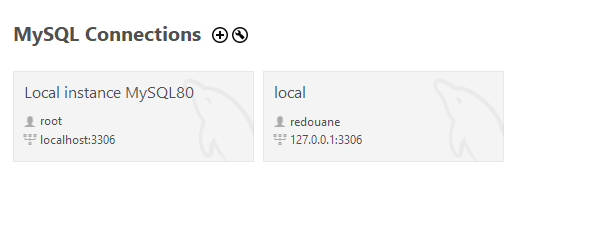

In [70]:
from IPython.display import Image
Image(filename='im1.png') 

il y 2 connections ici, chaque connection contient des databases.

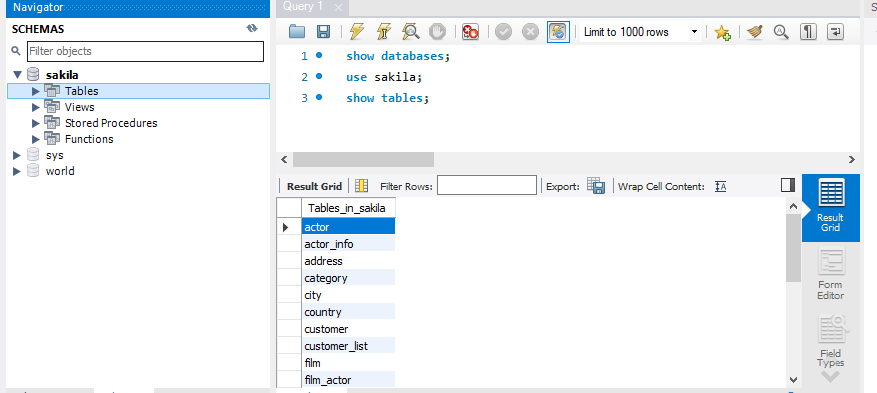

In [71]:
Image(filename='im2.png') 

* Ici dans cette connection on 3 databases : sakila,sys,world.

##### Cursor = interagir et communiquer avec la connection

In [72]:
mycursor=mydb.cursor()

### create database

In [ ]:
#create a database
#CREATE DATABASE db_name
mycursor.execute("CREATE DATABASE testdb")

In [74]:
mycursor

In [ ]:
Image(filename='im3.png')
# database testdb created

or to check u can use : show databases command

In [ ]:
mycursor.execute("SHOW DATABASES")

In [ ]:
#show dbs
for db in mycursor:
    print(db)

('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('testdb',)
('world',)


### create table

#we create a table in a specific db,to specify this db use database="name", in mydb.

In [82]:
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="mysql",
    database="testdb"
)

In [83]:
mycursor=mydb.cursor()

In [ ]:
mycursor.execute('CREATE TABLE students ( name VARCHAR(255),age INTEGER(10) )')

In [ ]:
mycursor.execute('SHOW TABLES')

In [ ]:
for tb in mycursor:
    print(tb)

('students',)


##### insert values in table

In [ ]:
sqlquery='''INSERT INTO students (name,age) 
VALUES (%s,%s)'''

In [ ]:
student1=("redouane",21)

In [ ]:
mycursor.execute(sqlquery,student1)

In [ ]:
student2=("Ahmed",20)
mycursor.execute(sqlquery,student2)

In [ ]:
students=[("mer",21),("bob",25),("gauss",26)]

In [ ]:
mycursor.executemany(sqlquery,students)

In [ ]:
mydb.commit()
#we use it we change db , cad modif in tables,but in retrieving(select) data we don't use it.

#### Selecting and Getting Data

select & fetch

In [77]:
mycursor.execute("SELECT * FROM students")

In [78]:
result=mycursor.fetchall()
#list de tuples, tuple=record
result
'''[('redouane', 21),
 ('redouane', 21),
 ('redouane', 21),
 ('Ahmed', 20),
 ('mer', 21),
 ('bob', 25),
 ('gauss', 26)]'''

[('redouane', 21),
 ('redouane', 21),
 ('redouane', 21),
 ('Ahmed', 20),
 ('mer', 21),
 ('bob', 25),
 ('gauss', 26)]

In [79]:
mycursor.execute("SELECT age FROM students")
result=mycursor.fetchall()
#list of tuples, tuple_i=(age_i,)
result
#[(21,), (21,), (21,), (20,), (21,), (25,), (26,)]

[(21,), (21,), (21,), (20,), (21,), (25,), (26,)]

In [80]:
mycursor.execute("SELECT age FROM students")
result=mycursor.fetchone()
#tuple_i=(age_i,) associé au premier record
result
#(21,)

(21,)

In [84]:
mycursor.execute("SELECT * FROM students WHERE age=25")
#mycursor.execute( "SELECT * FROM students WHERE age=%s" , (25,) )
results=mycursor.fetchall()
results

[('bob', 25)]

In [85]:
for result in results:
    print(result)

('bob', 25)


In [86]:
mycursor.execute("SELECT * FROM students WHERE name LIKE 'r%'")
results=mycursor.fetchall()
results

[('redouane', 21), ('redouane', 21), ('redouane', 21)]

In [87]:
for result in results:
    print(result)

('redouane', 21)
('redouane', 21)
('redouane', 21)


In [88]:
mycursor.execute("SELECT * FROM students WHERE name LIKE '%r%'")
results=mycursor.fetchall()
results

[('redouane', 21), ('redouane', 21), ('redouane', 21), ('mer', 21)]

In [91]:
mycursor.execute("SELECT * FROM students WHERE name='redouane'")
results=mycursor.fetchall()
results

[('redouane', 21), ('redouane', 21), ('redouane', 21)]

In [95]:
mycursor.execute("SELECT * FROM students WHERE name=%s",("redouane",))
results=mycursor.fetchall()
results

[('redouane', 21), ('redouane', 21), ('redouane', 21)]

In [96]:
for result in results:
    print(result)

('redouane', 21)
('redouane', 21)
('redouane', 21)


#### Updating an existing record

In [100]:
sqlquery="UPDATE students SET age=22 WHERE name='Ahmed'"

#if u don't mention where , all age records will be updated to 22

In [101]:
mycursor.execute(sqlquery)
#mycursor.execute( "UPDATE students SET age=%s WHERE name=%s" , (22,'Ahmed') )

In [102]:
mydb.commit()

In [104]:
sqlquery="SELECT * FROM students LIMIT 5 OFFSET 2"
#lines : 2,3,4,5,6

In [105]:
mycursor.execute(sqlquery)

In [106]:
results=mycursor.fetchall()
results

[('redouane', 21), ('Ahmed', 22), ('mer', 21), ('bob', 25), ('gauss', 26)]

##### Ordering our Queries

orderby : asc by default

In [107]:
sqlquery="SELECT * FROM students ORDER BY age"

In [108]:
mycursor.execute(sqlquery)
results=mycursor.fetchall()
results

[('redouane', 21),
 ('redouane', 21),
 ('redouane', 21),
 ('mer', 21),
 ('Ahmed', 22),
 ('bob', 25),
 ('gauss', 26)]

In [109]:
sqlquery="SELECT * FROM students ORDER BY %s"

In [112]:
mycursor.execute(sqlquery,("age",))
results=mycursor.fetchall()
results

[('redouane', 21),
 ('redouane', 21),
 ('redouane', 21),
 ('Ahmed', 22),
 ('mer', 21),
 ('bob', 25),
 ('gauss', 26)]

In [113]:
sqlquery="SELECT * FROM students ORDER BY age DESC"

In [115]:
mycursor.execute(sqlquery)
results=mycursor.fetchall()
results

[('gauss', 26),
 ('bob', 25),
 ('Ahmed', 22),
 ('redouane', 21),
 ('redouane', 21),
 ('redouane', 21),
 ('mer', 21)]

#### Delete an existing record

In [118]:
sqlquery="DELETE FROM students WHERE name='bob'"

In [119]:
mycursor.execute(sqlquery)

In [120]:
mydb.commit() 
# a ajouter pour assurer exécution

#### Delete TABLE

In [ ]:
sqlquery="DROP TABLE IF EXISTS students"
mycursor.execute(sqlquery)

In [ ]:
mydb.commit()

##### ADD COLUMN

In [ ]:
mycursor.execute("ALTER TABLE students ADD COLUMN Post VARCHAR(10)")
mydb.commit()

#### Change properties of an existing column

In [ ]:
mycursor.execute("ALTER TABLE students CHANGE Post Post VARCHAR(30)")
mydb.commit()